In [51]:
import random
from past.builtins import xrange
import math
import numpy as np 


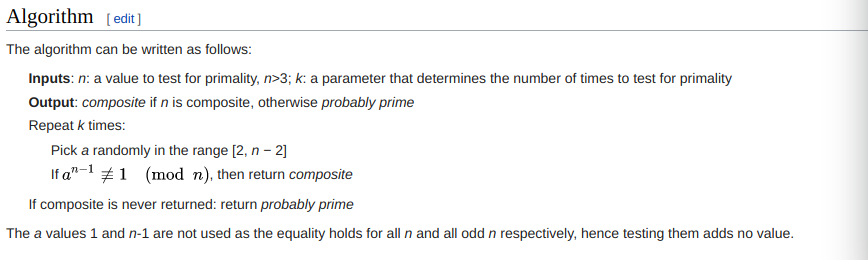

In [13]:
def fermat_test(p, k):
    if p < 3: return True
    if p % 2 == 0: return False
    
    for i in range(k):
        a = random.randint(2,p)
        if pow(a, p-1, p) != 1: return False
        
    return True

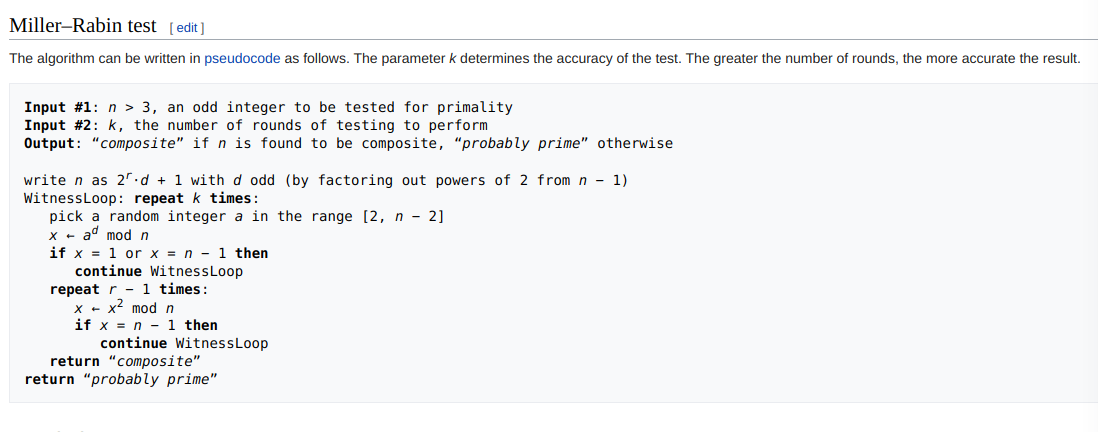

In [4]:
def miller_rabin_test(p, k):
    if p < 3: return True
    if p % 2 == 0: return False
    
    d = p - 1
    r = 1
    while (d % 2 == 0): 
        d //= 2
        r += 1
    
    for i in range(k):
        a = random.randint(2,p-1)
        x = pow(a, d, p)
        if x == 1 or x == p-1: continue
        
        cont = False
        for j in range(r-1):
            x = pow(x, 2, p)
            if x == p-1: 
                cont = True
                break
                
        if cont: continue
            
        return False
    return True

In [5]:
f_primes = set()
mr_primes = set()
for i in range(1, 100000):
    if fermat_test(i, 5): f_primes.add(i)
    if miller_rabin_test(i, 5): mr_primes.add(i)

In [6]:
print("Testing integers in range 1 to 100 000")
print("Number of primes found by Fermat test: %d" % len(f_primes))
print("Number of primes found by Miller-Rabin test: %d" % len(mr_primes))
print("Number of primes in both sets: %d" % len(f_primes.intersection(mr_primes)))
print("Size of symmetric difference: %d" % len(f_primes.symmetric_difference(mr_primes)))

Testing integers in range 1 to 100 000
Number of primes found by Fermat test: 9588
Number of primes found by Miller-Rabin test: 9593
Number of primes in both sets: 9583
Size of symmetric difference: 15


In [8]:
# Carmichael numbers less than 100 000:
c_numbers = [561, 1105, 1729, 2465, 2821, 6601, 8911, 10585, 15841, 29341, 41041, 46657, 
             52633, 62745, 63973, 75361]
f_prediction, mr_prediction = 0,0
for i in c_numbers:
    if fermat_test(i,5): f_prediction += 1
    if miller_rabin_test(i,5): mr_prediction += 1
        
print("The Fermat test predicts %d of %d Carmichael numbers are prime." % (f_prediction, len(c_numbers)))
print("The Miller-Rabin test predicts %d of %d Carmichael numbers are prime." % (mr_prediction, len(c_numbers)))

The Fermat test predicts 6 of 16 Carmichael numbers are prime.
The Miller-Rabin test predicts 0 of 16 Carmichael numbers are prime.


# Mersenne Numbers

In [ ]:
#Mersene numbers 
#In mathematics, a Mersenne prime is a prime number that is one less than a power of two. 
#That is, it is a prime number of the form Mn = 2n − 1 for some integer n. 
#They are named after Marin Mersenne, a French Minim friar, who studied them in the early 17th century.


In [24]:
def is_prime(number):
    if (number <= 1):
        return False
    
    for factor in range(2, number):
        if number % factor == 0:
            return False
        
    return True



In [25]:
def get_primes(n_start, n_end):
    list1 = []
    for number in range(n_start, n_end):
        if is_prime(number):
            list1.append(number)
    return list1
    


In [26]:
def mersenne_number(exp):
    number = (2**exp)-1
    return number

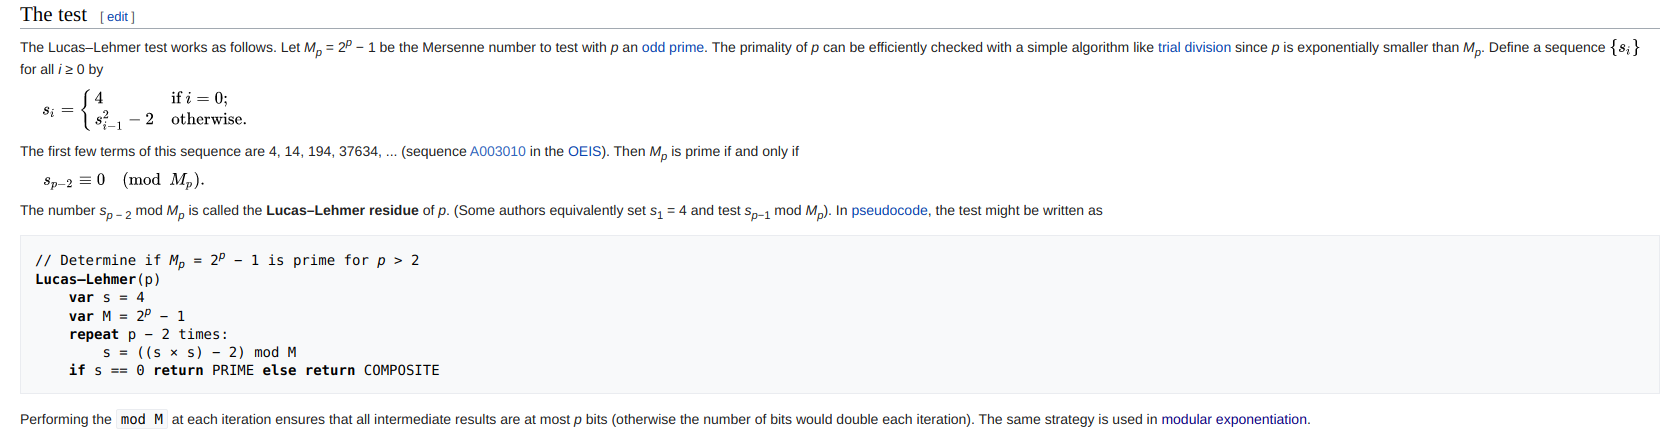

In [27]:
##Lucas–Lehme
# give any number to lucas_lehmer(), returns a list of of lucas_lehmer sequence upto i = p-2

def lucas_lehmer(p):
    list1 = [4]
    M = (2**p) - 1
    for i in range(1, p-1):
        list1.append(  ((list1[i-1]**2)-2) % M  )
    return list1

In [30]:
lucas_lehmer(12)

[4, 14, 194, 779, 779, 779, 779, 779, 779, 779, 779]

In [33]:
def ll_prime(p):
    list1 =  lucas_lehmer(p)   # if n^p-1 is prime return 0 else 0 
    if (list1[-1] == 0):
        return 1
    elif (list1[-1] != 0):
        return 0

In [63]:
def check_mersenne_primes(a, b):
    list1 = get_primes(a, b)     # Gets a list of Prime numbers b/w given numbers a, b i.e. 100,3000
    
    list2 = []                   # Gets a Mersenne number 2^n-1 for each prime number given in list 1   i.e. b/w 100 and 3000 
    for x in list1:
        list2.append(mersenne_number(x))
        
    list3 = []          # ll_prime calls the lucas_lehmer ftn which tests each prime number exponent given in list1 
    for i in list1:     # i.e. (exponents of mersenne_numbers) whether the corresponding mersenne_number in list is prime or not
           list3.append(ll_prime(i))
    #print(f'Prime exponents are prime or not i.e. 1 or 0 {list3}')
   
    y = list(zip(list2, list3))   # zip mersenne numbers and 1 or 0 to know whether it is prime or not, 1 is prime 0 is not prime
    return y

In [48]:
y = check_mersenne_primes(100, 3000)

In [69]:
mers=[]
for i in range(0,len(y)):
    if y[i][1]==1:
        mers.append(y[i][0])
        
        
    

In [70]:
print("Mersenne primes from 100<x<3000 are the following ")

Mersenne primes from 100<x<3000 are the following 


In [72]:
mers

[2535301200456458802993406410751,
 10141204801825835211973625643007,
 649037107316853453566312041152511,
 10384593717069655257060992658440191,
 2722258935367507707706996859454145691647,
 174224571863520493293247799005065324265471,
 696898287454081973172991196020261297061887,
 713623846352979940529142984724747568191373311,
 2854495385411919762116571938898990272765493247,
 182687704666362864775460604089535377456991567871,
 11692013098647223345629478661730264157247460343807,
 187072209578355573530071658587684226515959365500927,
 11972621413014756705924586149611790497021399392059391,
 766247770432944429179173513575154591809369561091801087,
 3064991081731777716716694054300618367237478244367204351,
 3138550867693340381917894711603833208051177722232017256447,
 12554203470773361527671578846415332832204710888928069025791,
 200867255532373784442745261542645325315275374222849104412671,
 803469022129495137770981046170581301261101496891396417650687,
 329100911464241208430993836511470100996547173126